# <span style='color:Blue'> Classification on Personal Loan Data
   

## <span style='color:Green'>Submitted By - Pramatosh Ray (QR2011)

This Notebook is about classification model on personal loan data and predicts whether a loan should be given or not

**Following Models are used Here**

1. SVM (Linear, Polynomial, Radial, Sigmoid)

2. Ensemble (Random Forest)

3. Ensemble (Bagging)

4. Ensemble (Boosting (Gradient boosting, Ada Boost, Stacking))

5. KNN

6. Logistic Regression  

7. CART   

8. Bayesian Learning (Naïve Bayes (Gaussian,Multinomial, Complement), Bayesian network)  


**List of dependency Libraries to run this File**
1. Numpy
2. Pandas
3. Seaborn
4. SKLearn
5. Matplotlib

## Importing common libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

rounding_factor=4

## Folder for saving the images

In [3]:
# Where to save the figures

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Personal Loan"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)



In [4]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    
    plt.savefig(path, format=fig_extension, dpi=resolution)



## <span style='color:green'> Data Insights

In [6]:
data=pd.read_csv('Personal Loan Data.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [7]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [8]:
for column in data:
    print(column ,end="  ")
    print(data[column].nunique())
    #print(data[column].value_counts())

Age  45
Experience  47
Income  162
Family  4
CCAvg  108
Education  3
Mortgage  347
Securities Account  2
CD Account  2
Online  2
CreditCard  2
Personal Loan  2


**Categorical and numerical variables are seperated**

In [9]:
var1=['Age','Experience','Income','CCAvg','Mortgage']
var2=['Family','Education','Securities Account','CD Account','Online','CreditCard']
var_all= ['Age','Experience','Income','CCAvg','Mortgage','Family','Education',
          'Securities Account','CD Account','Online','CreditCard']

## <span style='color:green'> Visualisation Plots

**Histogram Plots**

In [ ]:
%matplotlib inline

Saving figure Histogram of Age


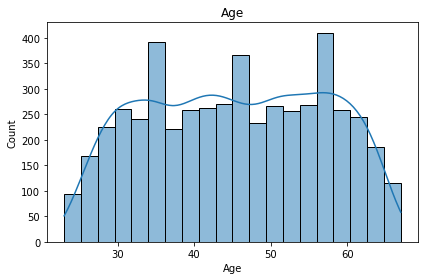

Saving figure Histogram of Experience


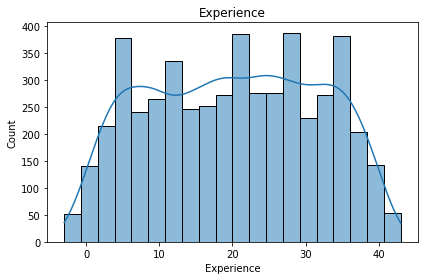

Saving figure Histogram of Income


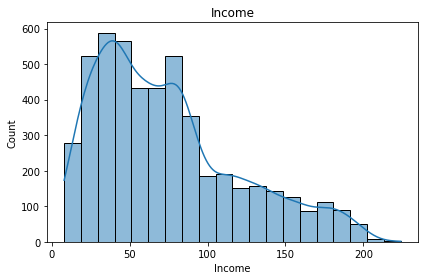

Saving figure Histogram of CCAvg


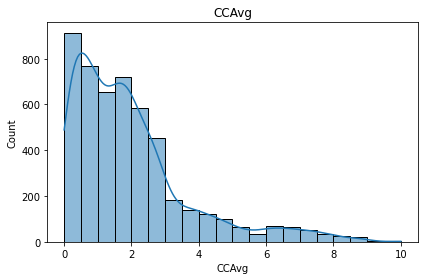

Saving figure Histogram of Mortgage


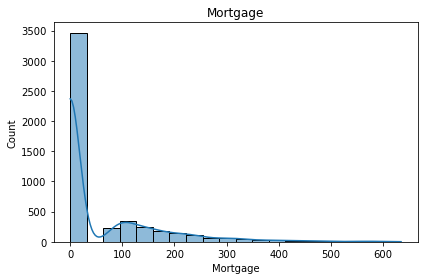

In [ ]:
for var in var1:
    #plt.figure(dpi=300)
    sns.histplot(data[var],bins=20, kde=True)

    plt.title(var)
    #plt.legend()
    save_fig(f"Histogram of {var}")
    plt.show()


**Density Plot Loan Status**

Saving figure Density plot of Age


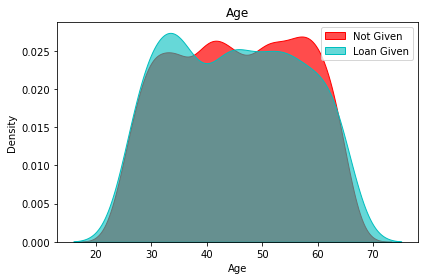

Saving figure Density plot of Experience


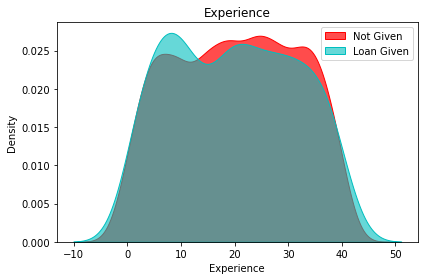

Saving figure Density plot of Income


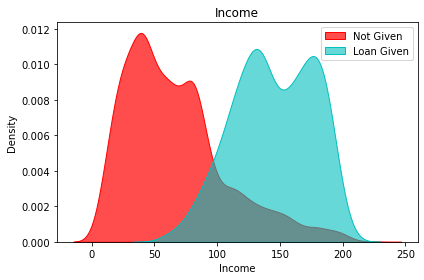

Saving figure Density plot of CCAvg


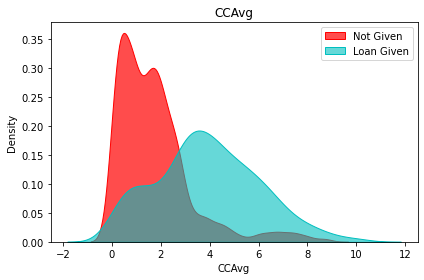

Saving figure Density plot of Mortgage


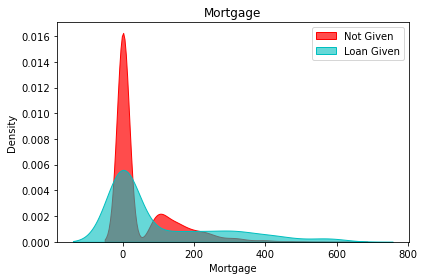

In [ ]:
for var in var1:
    #plt.figure(dpi=300)
    sns.kdeplot(data.loc[data['Personal Loan']==0,var], shade=True,
                color="r", label='Not Given', alpha=.7)
    sns.kdeplot(data.loc[data['Personal Loan']==1,var], shade=True, 
                color="c", label='Loan Given', alpha=.6)

    plt.title(var)
    plt.legend()
    save_fig(f"Density plot of {var}")    
    plt.show()


**Box Plot Loan Status**

Saving figure Box plot of Age


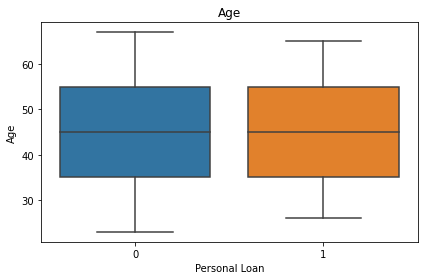

Saving figure Box plot of Experience


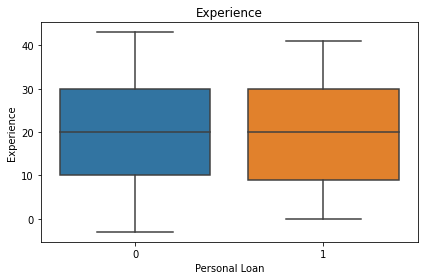

Saving figure Box plot of Income


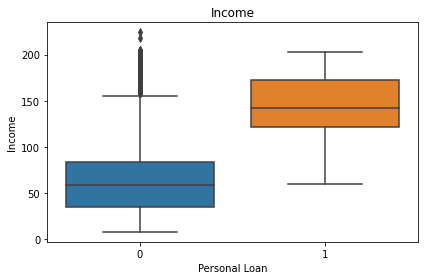

Saving figure Box plot of CCAvg


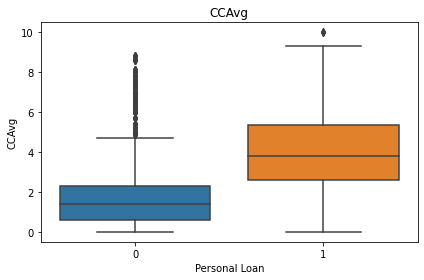

Saving figure Box plot of Mortgage


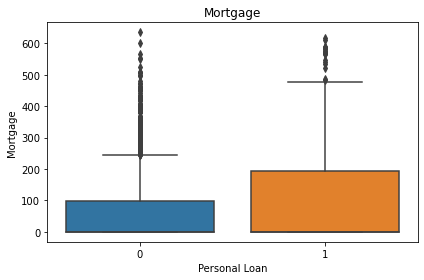

In [ ]:
for var in var1:
    #plt.figure(dpi=300)
    sns.boxplot(x='Personal Loan',y=var,data=data)

    plt.title(var)
    #plt.legend()
    save_fig(f"Box plot of {var}")    
    plt.show()


**Count Plot Loan Status**

Saving figure Count plot of Family


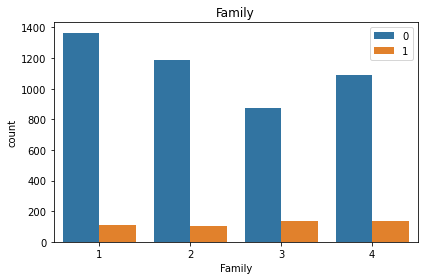

Saving figure Count plot of Education


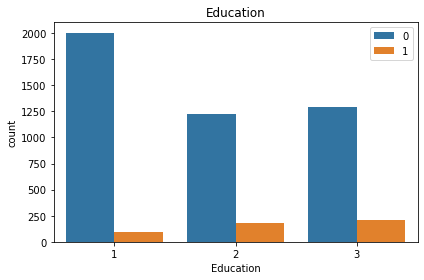

Saving figure Count plot of Securities Account


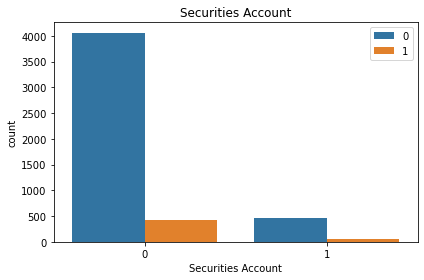

Saving figure Count plot of CD Account


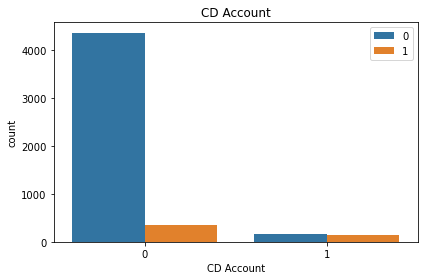

Saving figure Count plot of Online


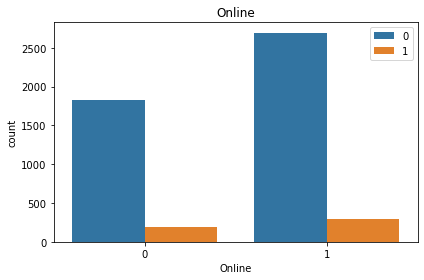

Saving figure Count plot of CreditCard


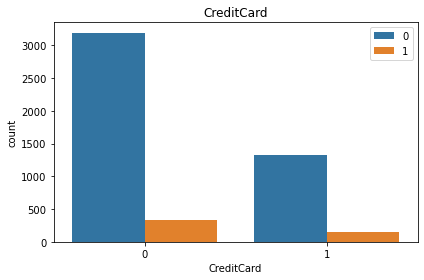

In [ ]:
for var in var2:
    #plt.figure(dpi=300)
    sns.countplot(x=var,hue='Personal Loan',data=data)    
    plt.title(var)
    plt.legend()
    save_fig(f"Count plot of {var}")    
    plt.show()


**Divided Bar Diagram Loan Status**

In [ ]:
def plot_stackedbar_p(df, labels, colors, title):

    fields = df.columns.tolist()    
    fig, ax = plt.subplots(1)# plot bars
    left = len(df) * [0]

    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]# title and subtitle

    plt.title(title, loc='left')
    #plt.text(0, ax.get_yticks()[-1] + 0.3, subtitle)# legend   
    plt.legend(labels,loc=4)# remove spines
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)# adjust limits and draw grid lines
    plt.ylim(-1, ax.get_yticks()[-1])
    ax.xaxis.grid(color='gray', linestyle='dashed') 
    save_fig(f"Divided Bar Diagram of {var}") 
    plt.show()


Saving figure Divided Bar Diagram of Family


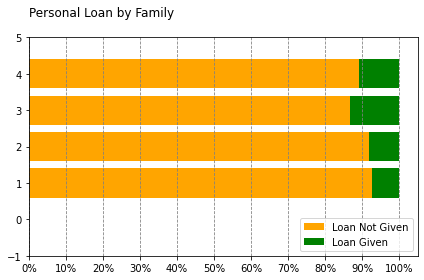

Saving figure Divided Bar Diagram of Education


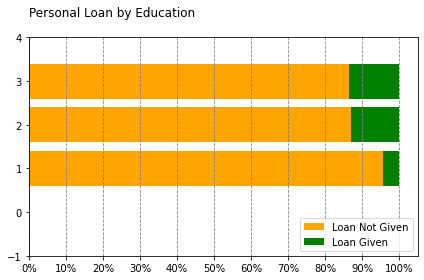

Saving figure Divided Bar Diagram of Securities Account


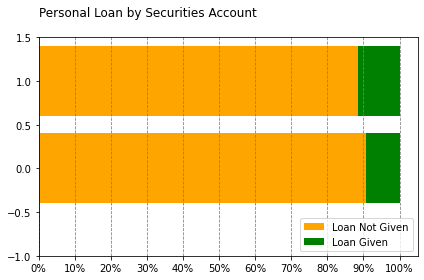

Saving figure Divided Bar Diagram of CD Account


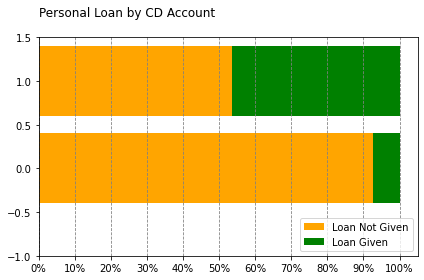

Saving figure Divided Bar Diagram of Online


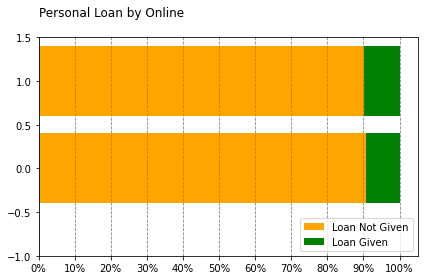

Saving figure Divided Bar Diagram of CreditCard


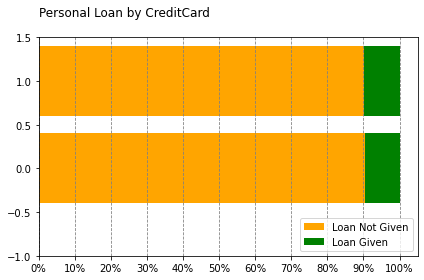

In [ ]:
for var in var2:
    df_agg=data[[var,'Personal Loan']].copy()

    for types in df_agg['Personal Loan'].unique():
        df_agg[types]=df_agg['Personal Loan'].map(lambda x : 1 if x==types else 0)

    df_agg.drop(['Personal Loan'],axis=1,inplace=True)
    df_agg=df_agg.groupby(var).sum()
    fields=[0,1]

    df_agg['Total'] = df_agg[fields].sum(axis=1)


    for i in fields:
        df_agg['{}_Percent'.format(i)] = df_agg[i] / df_agg['Total']


    df_agg.drop([0,1,'Total'],axis=1,inplace=True)

    # variables
    labels = ['Loan Not Given', 'Loan Given']
    colors = ['orange', 'green']
    title = f'Personal Loan by {var}\n'
   #subtitle = 'Proportion of loan Status'
    plot_stackedbar_p(df_agg, labels, colors, title)

**Correlation Matrix**

Saving figure Correlation Matrix Plot


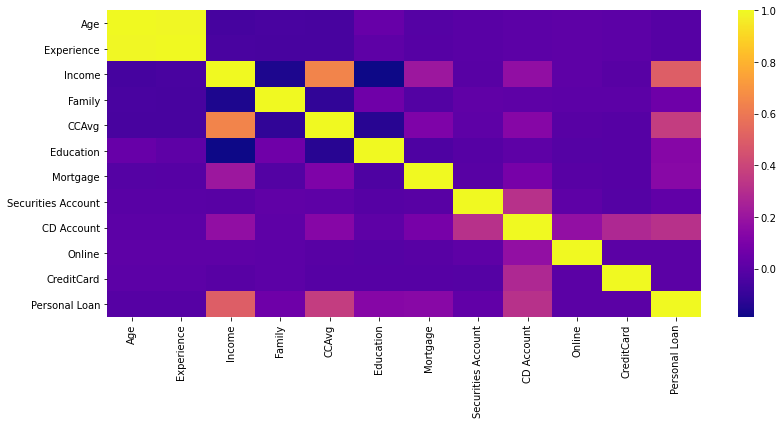

In [ ]:
corr_matrix=data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,cmap='plasma')
save_fig("Correlation Matrix Plot") 
plt.show()


**Kolmogorom Smirnov Test**

In [ ]:
from scipy import stats

for var in var1:
    df_1=data.loc[data['Personal Loan']==0,var]
    df_2=data.loc[data['Personal Loan']==1,var]
    test=stats.ks_2samp(df_1, df_2)
    p_value=round(test[1],6)
    print(p_value)
    if (p_value<0.01):
        print(f"Personal Loan depends on {var}")
    else:
        print(f"Personal Loan does not depend on {var}")


0.473165
Personal Loan does not depend on Age
0.480255
Personal Loan does not depend on Experience
0.0
Personal Loan depends on Income
0.0
Personal Loan depends on CCAvg
0.0
Personal Loan depends on Mortgage


## <span style='color:Green'>Data Preprocessing

In [10]:
unique_data=data.copy()

In [11]:
unique_data[(unique_data["Experience"]< 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 89 to 4957
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 52 non-null     int64  
 1   Experience          52 non-null     int64  
 2   Income              52 non-null     int64  
 3   Family              52 non-null     int64  
 4   CCAvg               52 non-null     float64
 5   Education           52 non-null     int64  
 6   Mortgage            52 non-null     int64  
 7   Securities Account  52 non-null     int64  
 8   CD Account          52 non-null     int64  
 9   Online              52 non-null     int64  
 10  CreditCard          52 non-null     int64  
 11  Personal Loan       52 non-null     int64  
dtypes: float64(1), int64(11)
memory usage: 5.3 KB


In [12]:
unique_data = unique_data [(unique_data>=0).all(axis=1)]

In [13]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4948 non-null   int64  
 1   Experience          4948 non-null   int64  
 2   Income              4948 non-null   int64  
 3   Family              4948 non-null   int64  
 4   CCAvg               4948 non-null   float64
 5   Education           4948 non-null   int64  
 6   Mortgage            4948 non-null   int64  
 7   Securities Account  4948 non-null   int64  
 8   CD Account          4948 non-null   int64  
 9   Online              4948 non-null   int64  
 10  CreditCard          4948 non-null   int64  
 11  Personal Loan       4948 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 502.5 KB


In [14]:
unique_data.drop_duplicates(keep='first',inplace=True)

In [15]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4935 non-null   int64  
 1   Experience          4935 non-null   int64  
 2   Income              4935 non-null   int64  
 3   Family              4935 non-null   int64  
 4   CCAvg               4935 non-null   float64
 5   Education           4935 non-null   int64  
 6   Mortgage            4935 non-null   int64  
 7   Securities Account  4935 non-null   int64  
 8   CD Account          4935 non-null   int64  
 9   Online              4935 non-null   int64  
 10  CreditCard          4935 non-null   int64  
 11  Personal Loan       4935 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 501.2 KB


In [16]:
unique_data.reset_index(inplace = True)

In [17]:
unique_data.head()

,index,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [18]:
filtered_data=unique_data.copy()

In [ ]:
filtered_data['Personal Loan'].value_counts()

0    4455
1     480
Name: Personal Loan, dtype: int64

In [ ]:
filtered_data['Personal Loan']=filtered_data['Personal Loan'].apply(lambda x: 
                                                                    "Loan Given" if x==1 else "Loan Not Given" )

In [ ]:
filtered_data['Personal Loan'].value_counts()

Loan Not Given    4455
Loan Given         480
Name: Personal Loan, dtype: int64

## <span style='color:Green'>Data Transformation

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]




In [20]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## <span style='color:Green'>Test Train Segmentation

In [22]:
final_data=unique_data.copy()

**Here we divite the processed dataset into train and test dataset. we use**
1. 70% data for training
2. 15% data for validation
3. 15% data for testing 


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)


for train_index,test_index in split.split(final_data,final_data["Personal Loan"]):
	strat_train_set=final_data.loc[train_index]
	strat_test_set=final_data.loc[test_index]

train_data=strat_train_set.copy()
remain_data=strat_test_set.copy()
remain_data.reset_index(inplace = True)


print("Train\n",strat_train_set["Personal Loan"].value_counts()/len(strat_train_set))


split=StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=42)
for valid_index,test_index in split.split(remain_data,remain_data["Personal Loan"]):
	strat_valid_set = remain_data.loc[valid_index]
	strat_test_set = remain_data.loc[test_index]    

print("Valid\n",strat_valid_set["Personal Loan"].value_counts()/len(strat_valid_set))
print("Test\n",strat_test_set["Personal Loan"].value_counts()/len(strat_test_set))
print("Actual\n",final_data["Personal Loan"].value_counts()/len(final_data))


valid_data=strat_valid_set.copy()
test_data=strat_test_set.copy()

Train
 0    0.902721
1    0.097279
Name: Personal Loan, dtype: float64
Valid
 0    0.902703
1    0.097297
Name: Personal Loan, dtype: float64
Test
 0    0.902834
1    0.097166
Name: Personal Loan, dtype: float64
Actual
 0    0.902736
1    0.097264
Name: Personal Loan, dtype: float64


In [24]:
train_data.shape

(3454, 13)

In [25]:
test_data.shape

(741, 14)

In [26]:
valid_data.shape

(740, 14)

## Pipeline with All Attributes

In [27]:
num_pipeline_all = Pipeline([
        ("select_numeric", DataFrameSelector(var1)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [28]:
cat_pipeline_all = Pipeline([
        ("select_cat", DataFrameSelector(var2)),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


In [29]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline_all = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_all),
        ("cat_pipeline", cat_pipeline_all),
    ])

In [30]:
X_train_all = preprocess_pipeline_all.fit_transform(train_data)
y_train_all = train_data["Personal Loan"]


In [31]:
X_train_all.shape

(3454, 20)

In [32]:
y_train_all.shape

(3454,)

In [33]:
X_test_all = preprocess_pipeline_all.transform(test_data)
y_test_all = test_data["Personal Loan"]

In [34]:
X_test_all.shape

(741, 20)

In [35]:
y_test_all.shape

(741,)

In [36]:
X_valid_all = preprocess_pipeline_all.transform(valid_data)
y_valid_all = valid_data["Personal Loan"]

In [37]:
X_valid_all.shape

(740, 20)

In [38]:
y_valid_all.shape

(740,)

##  Pipeline with Selected Attributes

In [39]:
num_pipeline_selected = Pipeline([
        ("select_numeric", DataFrameSelector(["Income", "CCAvg", "Mortgage"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [40]:
cat_pipeline_selected = Pipeline([
        ("select_cat", DataFrameSelector(["Education", "CD Account", "Family"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


In [41]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline_selected = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_selected),
        ("cat_pipeline", cat_pipeline_selected),
    ])

In [42]:
X_train_selected = preprocess_pipeline_selected.fit_transform(train_data)
y_train_selected = train_data["Personal Loan"]


In [43]:
X_train_selected.shape

(3454, 12)

In [44]:
y_train_selected.shape

(3454,)

In [45]:
X_test_selected = preprocess_pipeline_selected.transform(test_data)
y_test_selected = test_data["Personal Loan"]

In [46]:
X_test_selected.shape

(741, 12)

In [47]:
y_test_selected.shape

(741,)

In [48]:
X_valid_selected = preprocess_pipeline_selected.transform(valid_data)
y_valid_selected = valid_data["Personal Loan"]

In [49]:
X_valid_selected.shape

(740, 12)

In [50]:
y_valid_selected.shape

(740,)

# <span style='color:Green'>Classifier Training

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
def plot_roc_curve(y_train,y_scores, label=None):
    
    fpr, tpr, thresholds = roc_curve(y_train,y_scores)
    print(round((roc_auc_score(y_train, y_scores)),rounding_factor))
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                               
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)  
    plt.grid(True)            
    plt.show()
    

In [53]:
def plot_cf_matrix(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values ')
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [54]:
def print_classification_report(y_train,y_train_pred):
    print()
    print('=============Confusion Matrix =============')
    print(confusion_matrix(y_train, y_train_pred))


    y_train_perfect_predictions = y_train #Perfect Prediction
    print()
    print('Perfect Prediction If Done')
    print(confusion_matrix(y_train, y_train_perfect_predictions))


    print()
    print("=============Sumarry Measures==============")
    print('Precision Score = ',round((precision_score(y_train, y_train_pred)),rounding_factor))
    print('Recall = ', round((recall_score(y_train, y_train_pred)),rounding_factor))
    print('F1 Value = ', round((f1_score(y_train, y_train_pred)),rounding_factor))


#  <span style='color:Red'> Support Vector Machine

## <span style='color:Red'>SVM (Polynomial Kernel)

In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_clf_poly = make_pipeline(StandardScaler(),SVC(gamma="auto",class_weight="balanced",C=3,
                                             kernel="poly",probability=True))


## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [56]:
svm_clf_poly.fit(X_train_all, y_train_all)

svm_scores = cross_val_score(svm_clf_poly, X_train_all, y_train_all, cv=6)
print(svm_scores.mean())


0.9739437399355877


**Confusion Matrix for  SVM: Train Data**

In [57]:
y_train_pred = svm_clf_poly.predict( X_train_all)

print_classification_report(y_train_all,y_train_pred)



=============Confusion Matrix =============
[[3079   39]
 [  10  326]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8932
Recall =  0.9702
F1 Value =  0.9301


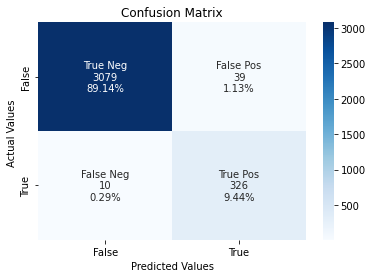

In [58]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9798


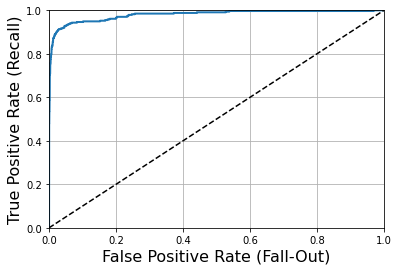

Saving figure ROC for SVM Full Model Poly Kernel


<Figure size 432x288 with 0 Axes>

In [59]:
y_probas_svm = cross_val_predict(svm_clf_poly, X_train_all, y_train_all,method="predict_proba")
y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class                     

plot_roc_curve(y_train_all ,y_scores_svm)
save_fig("ROC for SVM Full Model Poly Kernel")


## <span style='color:Orange'>Performance on Validation Set

In [60]:
y_valid_pred = svm_clf_poly.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[656  12]
 [ 12  60]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8333
Recall =  0.8333
F1 Value =  0.8333


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [61]:
svm_clf_poly.fit(X_train_selected, y_train_selected)

svm_scores = cross_val_score(svm_clf_poly, X_train_selected, y_train_selected, cv=6)
print(svm_scores.mean())

0.9695974235104671


**Confusion Matrix**

In [62]:
y_train_pred = svm_clf_poly.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)



=============Confusion Matrix =============
[[3057   61]
 [  14  322]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8407
Recall =  0.9583
F1 Value =  0.8957


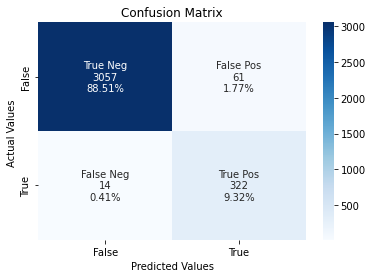

In [63]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9892


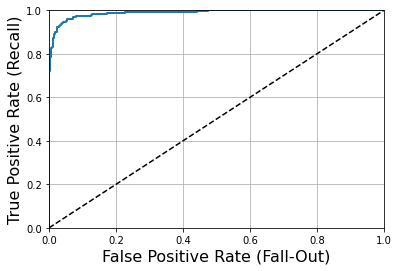

Saving figure ROC for SVM Partial Model Poly Kernel


<Figure size 432x288 with 0 Axes>

In [64]:
y_probas_svm = cross_val_predict(svm_clf_poly, X_train_selected, y_train_selected,method="predict_proba")
y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class                     

plot_roc_curve(y_train_selected,y_scores_svm)
save_fig("ROC for SVM Partial Model Poly Kernel")

## <span style='color:Orange'>Performance on Validation Set

In [65]:
y_valid_pred = svm_clf_poly.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[655  13]
 [  5  67]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8375
Recall =  0.9306
F1 Value =  0.8816


## <span style='color:Red'>SVM (Linear Kernel)

In [66]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_clf_lin = make_pipeline(StandardScaler(),SVC(gamma="auto",class_weight={0:1,1:2},C=2,
                                             kernel="linear",probability=True))


## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [67]:
svm_clf_lin.fit(X_train_all, y_train_all)

svm_scores = cross_val_score(svm_clf_lin, X_train_all, y_train_all, cv=6)
print(svm_scores.mean())

0.9571568035426732


**Confusion Matrix**

In [68]:
y_train_pred = svm_clf_lin.predict( X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3056   62]
 [  77  259]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8069
Recall =  0.7708
F1 Value =  0.7884


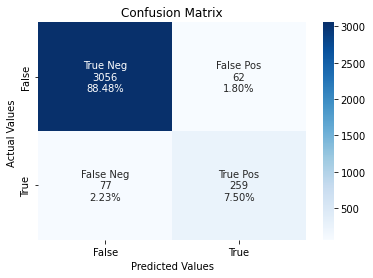

In [69]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9607


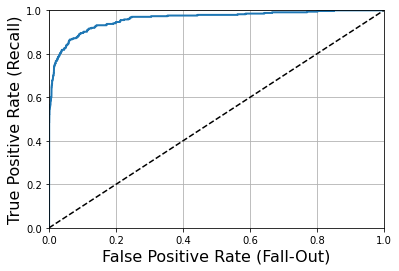

Saving figure ROC for SVM Full Model Linear Kernel


<Figure size 432x288 with 0 Axes>

In [70]:
y_probas_svm = cross_val_predict(svm_clf_lin, X_train_all, y_train_all,method="predict_proba")
y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class                     

plot_roc_curve(y_train_all ,y_scores_svm)
save_fig("ROC for SVM Full Model Linear Kernel")


## <span style='color:Orange'>Performance on Validation Set

In [71]:
y_valid_pred = svm_clf_lin.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[654  14]
 [ 21  51]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.7846
Recall =  0.7083
F1 Value =  0.7445


## <span style='color:Red'>SVM (RBF Kernel)

In [72]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_clf_rbf = make_pipeline(StandardScaler(),SVC(gamma="auto",class_weight="balanced",C=2,
                                             kernel="rbf",probability=True))


## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [73]:
svm_clf_rbf.fit(X_train_all, y_train_all)

svm_scores = cross_val_score(svm_clf_rbf, X_train_all, y_train_all, cv=6)
print(svm_scores.mean())

0.9745204307568437


**Confusion Matrix**

In [74]:
y_train_pred = svm_clf_rbf.predict( X_train_all)
print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3065   53]
 [   9  327]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8605
Recall =  0.9732
F1 Value =  0.9134


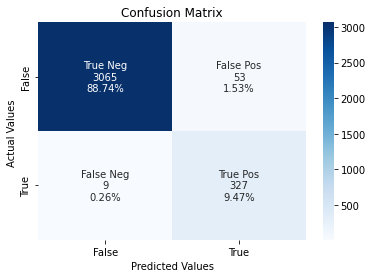

In [75]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.985


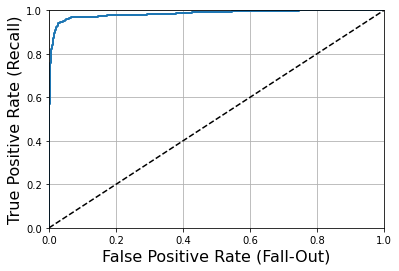

Saving figure ROC for SVM Full Model RBF Kernel


<Figure size 432x288 with 0 Axes>

In [76]:
y_probas_svm = cross_val_predict(svm_clf_rbf, X_train_all, y_train_all,method="predict_proba")
y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class                     

plot_roc_curve(y_train_all ,y_scores_svm)
save_fig("ROC for SVM Full Model RBF Kernel")


## <span style='color:Orange'>Performance on Validation Set

In [77]:
y_valid_pred = svm_clf_rbf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[647  21]
 [  8  64]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.7529
Recall =  0.8889
F1 Value =  0.8153


## <span style='color:Red'>SVM (Sigmoid Kernel)

In [78]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_clf_sig = make_pipeline(StandardScaler(),SVC(gamma="auto",class_weight="balanced",C=2,
                                             kernel="sigmoid",probability=True))

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [79]:
svm_clf_sig.fit(X_train_all, y_train_all)

svm_scores = cross_val_score(svm_clf_sig , X_train_all, y_train_all, cv=10)
print(svm_scores.mean())

0.8196439641450951


**Confusion Matrix**

In [80]:
y_train_pred = svm_clf_sig.predict( X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[2558  560]
 [  63  273]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.3277
Recall =  0.8125
F1 Value =  0.4671


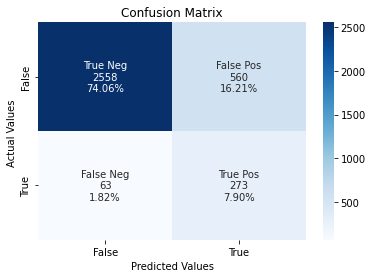

In [81]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.8692


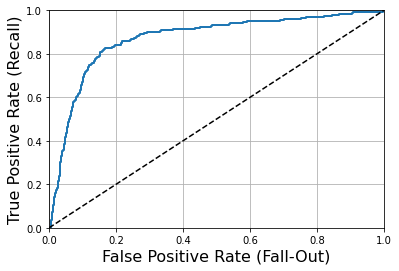

Saving figure ROC for SVM Full Model RBF Kernel


<Figure size 432x288 with 0 Axes>

In [82]:
y_probas_svm = cross_val_predict(svm_clf_sig, X_train_all, y_train_all,method="predict_proba")

y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class                     

plot_roc_curve(y_train_all ,y_scores_svm)
save_fig("ROC for SVM Full Model RBF Kernel")


## <span style='color:Orange'>Performance on Validation Set

In [83]:
y_valid_pred = svm_clf_sig.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[556 112]
 [  9  63]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.36
Recall =  0.875
F1 Value =  0.5101


## <span style='color:Red'>Ensemble (Random Forest)

In [84]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_split=8,
                                    min_samples_leaf=4,class_weight="balanced",oob_score=True)


## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [85]:
forest_clf.fit(X_train_all, y_train_all)
forest_scores = cross_val_score(forest_clf, X_train_all, y_train_all, cv=6)
print(forest_scores.mean())

0.9797307769726248


**Confusion Matrix for Random Forest: Train Data**

In [86]:
y_train_pred = forest_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3085   33]
 [   3  333]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.9098
Recall =  0.9911
F1 Value =  0.9487


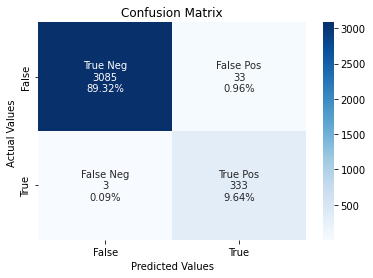

In [87]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9996


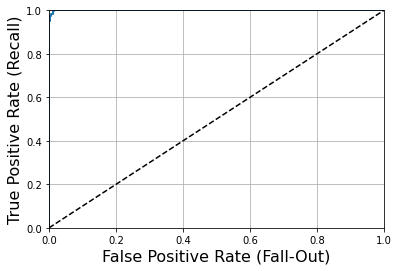

Saving figure ROC for Random Forest Full Model


<Figure size 432x288 with 0 Axes>

In [88]:
y_probas_forest = forest_clf.predict_proba( X_train_all)

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

plot_roc_curve(y_train_all ,y_scores_forest)
save_fig("ROC for Random Forest Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [89]:
y_valid_pred = forest_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[661   7]
 [  2  70]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9091
Recall =  0.9722
F1 Value =  0.9396


## <span style='color:Blue'> Model with Selected Attributes

## <span style='color:Orange'> Training

In [90]:
forest_clf.fit(X_train_selected, y_train_selected)
forest_scores = cross_val_score(forest_clf, X_train_selected, y_train_selected, cv=6)
print(forest_scores.mean())

0.9791505636070853


**Confusion Matrix**

In [91]:
y_train_pred = forest_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3078   40]
 [   4  332]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8925
Recall =  0.9881
F1 Value =  0.9379


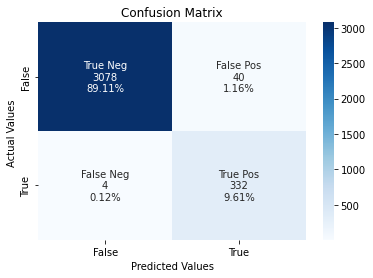

In [92]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9993


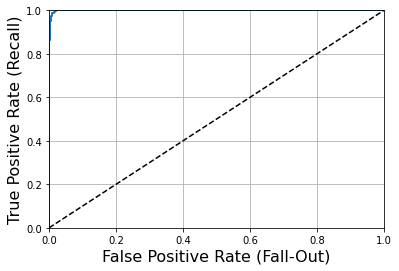

Saving figure ROC for Random Forest Partial Model


<Figure size 432x288 with 0 Axes>

In [93]:
y_probas_forest = forest_clf.predict_proba(X_train_selected)

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

plot_roc_curve(y_train_selected ,y_scores_forest)
save_fig("ROC for Random Forest Partial Model")


## <span style='color:Orange'>Performance on Validation Set

In [94]:
y_valid_pred = forest_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[657  11]
 [  1  71]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8659
Recall =  0.9861
F1 Value =  0.9221


## <span style='color:Red'>Ensemble (Bagging)

In [95]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(n_estimators=5, random_state=42)

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [96]:
bagging_clf.fit(X_train_all, y_train_all)
bagging_scores = cross_val_score(bagging_clf, X_train_all, y_train_all, cv=6)
print(bagging_scores.mean())

0.9823399758454107


**Confusion Matrix**

In [97]:
y_train_pred = bagging_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3115    3]
 [   4  332]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.991
Recall =  0.9881
F1 Value =  0.9896


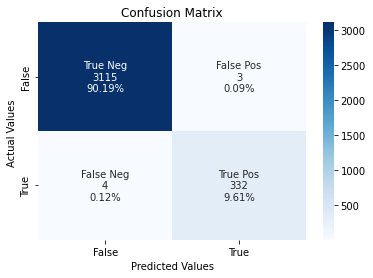

In [98]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9999


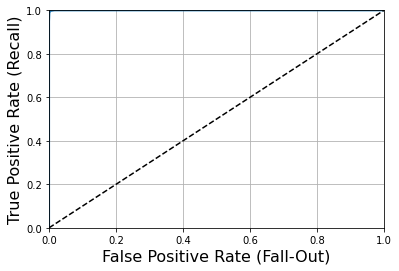

Saving figure ROC for Bagging Full Model


<Figure size 432x288 with 0 Axes>

In [99]:
y_probas_bagging = bagging_clf.predict_proba( X_train_all)
y_scores_bagging = y_probas_bagging [:,-1]

plot_roc_curve(y_train_all ,y_scores_bagging)
save_fig("ROC for Bagging Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [100]:
y_valid_pred = bagging_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[666   2]
 [  6  66]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9706
Recall =  0.9167
F1 Value =  0.9429


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [101]:
bagging_clf.fit(X_train_selected, y_train_selected)
bagging_scores = cross_val_score(bagging_clf, X_train_selected, y_train_selected, cv=6)
print(bagging_scores.mean())

0.9829176731078905


In [102]:
y_train_pred = bagging_clf.predict(X_train_selected)
    
print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3115    3]
 [   1  335]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.9911
Recall =  0.997
F1 Value =  0.9941


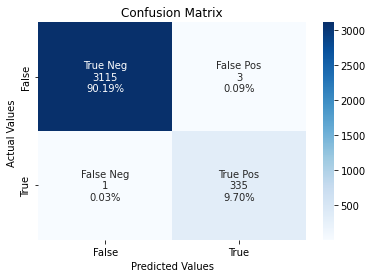

In [103]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9999


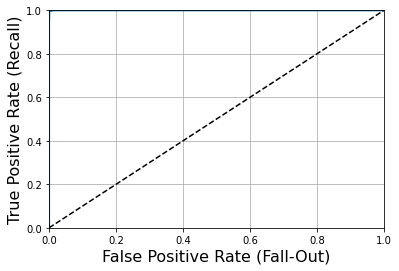

Saving figure ROC for Bagging Partial Model


<Figure size 432x288 with 0 Axes>

In [104]:
y_probas_bagging = bagging_clf.predict_proba( X_train_selected)
y_scores_bagging = y_probas_bagging [:,-1]

plot_roc_curve(y_train_selected ,y_scores_bagging)
save_fig("ROC for Bagging Partial Model")

## <span style='color:Orange'>Performance on Validation Set

In [105]:
y_valid_pred = bagging_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[664   4]
 [  7  65]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.942
Recall =  0.9028
F1 Value =  0.922


## <span style='color:Red'> Ensemble (Boosting)

## <span style='color:Red'> Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_clf = GradientBoostingClassifier(n_estimators=50, random_state=42,learning_rate = 1,
                                                  min_samples_split=10,min_samples_leaf=4,max_depth=2)

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [107]:
gradient_boosting_clf.fit(X_train_all, y_train_all)
gradient_boosting_scores = cross_val_score(gradient_boosting_clf, X_train_all, y_train_all, cv=6)
print(gradient_boosting_scores.mean())

0.9785738727858293


**Confusion Matrix**

In [108]:
y_train_pred = gradient_boosting_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3093   25]
 [  16  320]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.9275
Recall =  0.9524
F1 Value =  0.9398


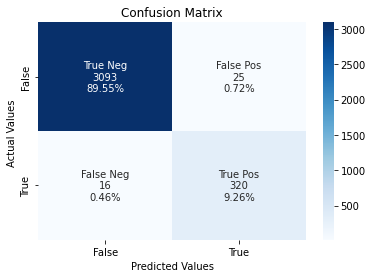

In [109]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9928


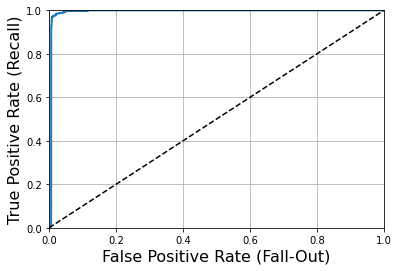

Saving figure ROC for Gradient Boosting Full Model


<Figure size 432x288 with 0 Axes>

In [110]:
y_probas_boosting = gradient_boosting_clf.predict_proba( X_train_all)
y_scores_boosting = y_probas_boosting [:,-1]

plot_roc_curve(y_train_all ,y_scores_boosting)
save_fig("ROC for Gradient Boosting Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [111]:
y_valid_pred = gradient_boosting_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[656  12]
 [  6  66]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8462
Recall =  0.9167
F1 Value =  0.88


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [112]:
gradient_boosting_clf.fit(X_train_selected, y_train_selected)
gradient_boosting_scores = cross_val_score(gradient_boosting_clf, X_train_selected, y_train_selected, cv=6)
print(gradient_boosting_scores.mean())

0.9785688405797103


**Confusion Matrix**

In [113]:
y_train_pred = gradient_boosting_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3113    5]
 [  17  319]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.9846
Recall =  0.9494
F1 Value =  0.9667


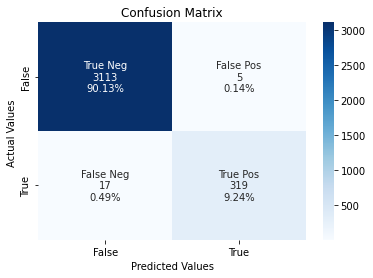

In [114]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9964


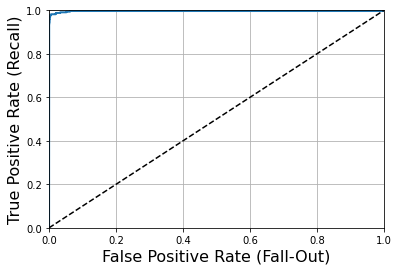

Saving figure ROC for Gradient Boosting Partial Model


<Figure size 432x288 with 0 Axes>

In [115]:
y_probas_boosting = gradient_boosting_clf.predict_proba( X_train_selected)
y_scores_boosting = y_probas_boosting [:,-1]

plot_roc_curve(y_train_all ,y_scores_boosting)
save_fig("ROC for Gradient Boosting Partial Model")


## <span style='color:Orange'>Performance on Validation Set

In [116]:
y_valid_pred = gradient_boosting_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[664   4]
 [  5  67]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9437
Recall =  0.9306
F1 Value =  0.9371


## <span style='color:Red'>  Ada Boost

In [117]:
from sklearn.ensemble import AdaBoostClassifier

ada_boosting_clf = AdaBoostClassifier(n_estimators=50, random_state=42,learning_rate = 1)

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [118]:
ada_boosting_clf.fit(X_train_all, y_train_all)
ada_boosting_scores = cross_val_score(ada_boosting_clf, X_train_all, y_train_all, cv=6)
print(ada_boosting_scores.mean())

0.9646794484702094


**Confusion Matrix**

In [119]:
y_train_pred = ada_boosting_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3089   29]
 [  80  256]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8982
Recall =  0.7619
F1 Value =  0.8245


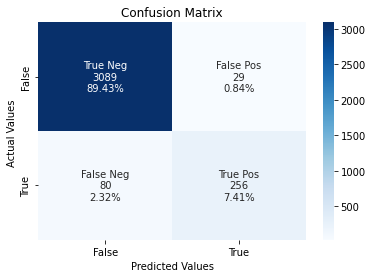

In [120]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9877


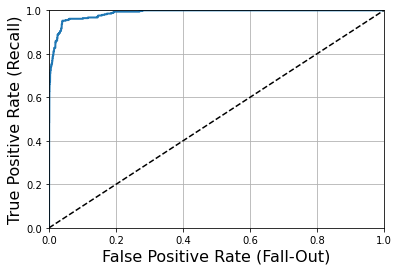

Saving figure ROC for Ada Boosting Full Model


<Figure size 432x288 with 0 Axes>

In [121]:
y_probas_boosting = ada_boosting_clf.predict_proba( X_train_all)
y_scores_boosting = y_probas_boosting [:,-1]

plot_roc_curve(y_train_all ,y_scores_boosting)
save_fig("ROC for Ada Boosting Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [122]:
y_valid_pred = ada_boosting_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[665   3]
 [ 18  54]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9474
Recall =  0.75
F1 Value =  0.8372


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [123]:
ada_boosting_clf.fit(X_train_selected, y_train_selected)
ada_boosting_scores = cross_val_score(ada_boosting_clf, X_train_selected, y_train_selected, cv=6)
print(ada_boosting_scores.mean())

0.9652601650563608


**Confusion Matrix**

In [124]:
y_train_pred = ada_boosting_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3095   23]
 [  77  259]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.9184
Recall =  0.7708
F1 Value =  0.8382


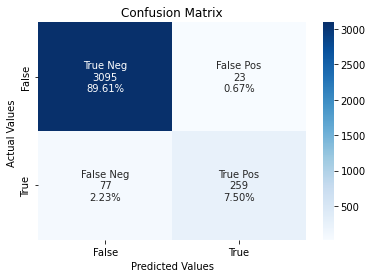

In [125]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9861


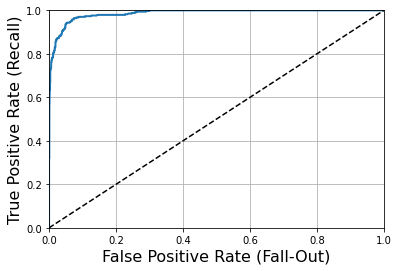

Saving figure ROC for Ada Boosting Partial Model


<Figure size 432x288 with 0 Axes>

In [126]:
y_probas_boosting = ada_boosting_clf.predict_proba( X_train_selected)
y_scores_boosting = y_probas_boosting [:,-1]

plot_roc_curve(y_train_all ,y_scores_boosting)
save_fig("ROC for Ada Boosting Partial Model")


## <span style='color:Orange'>Performance on Validation Set

In [127]:
y_valid_pred = ada_boosting_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[663   5]
 [ 16  56]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.918
Recall =  0.7778
F1 Value =  0.8421


## <span style='color:Red'>  Stacking

In [128]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr',make_pipeline(StandardScaler(),SVC(gamma="auto",class_weight="balanced",C=1,
                                                        kernel="poly",probability=True)))]


Stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),
                                  stack_method="predict_proba")

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [129]:
Stacking_clf.fit(X_train_all, y_train_all)
Stacking_scores = cross_val_score(Stacking_clf, X_train_all, y_train_all, cv=6)
print(Stacking_scores.mean())

0.9834953703703704


**Confusion Matrix**

In [130]:
y_train_pred = Stacking_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3117    1]
 [   6  330]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.997
Recall =  0.9821
F1 Value =  0.9895


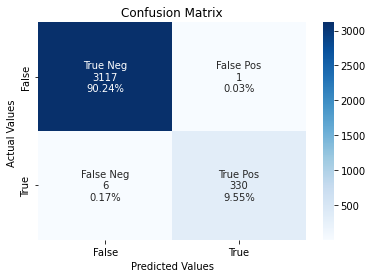

In [131]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9999


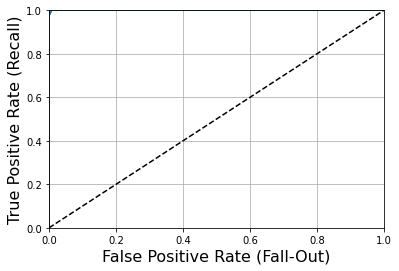

Saving figure ROC for stacking Full Model


<Figure size 432x288 with 0 Axes>

In [132]:
y_probas_stacking = Stacking_clf.predict_proba( X_train_all)
y_scores_stacking = y_probas_stacking [:,-1]

plot_roc_curve(y_train_all ,y_scores_stacking)
save_fig("ROC for stacking Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [133]:
y_valid_pred = Stacking_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[667   1]
 [  9  63]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9844
Recall =  0.875
F1 Value =  0.9265


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [134]:
Stacking_clf.fit(X_train_selected, y_train_selected)
stacking_scores = cross_val_score(Stacking_clf, X_train_selected, y_train_selected, cv=6)
print(stacking_scores.mean())

0.9814678945249597


**Confusion Matrix**

In [135]:
y_train_pred = Stacking_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3117    1]
 [   7  329]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.997
Recall =  0.9792
F1 Value =  0.988


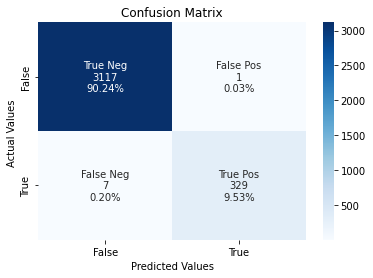

In [136]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9999


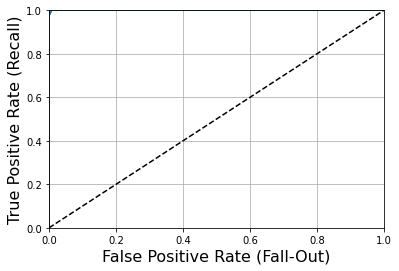

Saving figure ROC for Stacking Partial Model


<Figure size 432x288 with 0 Axes>

In [137]:
y_probas_stacking = Stacking_clf.predict_proba( X_train_selected)
y_scores_stacking = y_probas_stacking [:,-1]

plot_roc_curve(y_train_selected ,y_scores_stacking)
save_fig("ROC for Stacking Partial Model")


## <span style='color:Orange'>Performance on Validation Set

In [138]:
y_valid_pred = Stacking_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[667   1]
 [  8  64]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9846
Recall =  0.8889
F1 Value =  0.9343


## <span style='color:Red'> KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier(n_neighbors=3)

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [140]:
neigh_clf.fit(X_train_all, y_train_all)
neigh_scores = cross_val_score(neigh_clf, X_train_all, y_train_all, cv=6)
print(neigh_scores.mean())

0.903010768921095


**Confusion Matrix**

In [141]:
y_train_pred = neigh_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3076   42]
 [ 124  212]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8346
Recall =  0.631
F1 Value =  0.7186


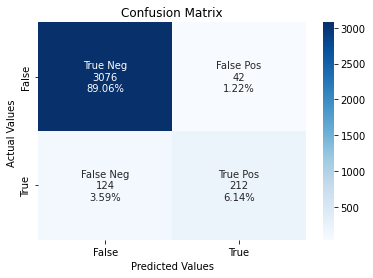

In [142]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9781


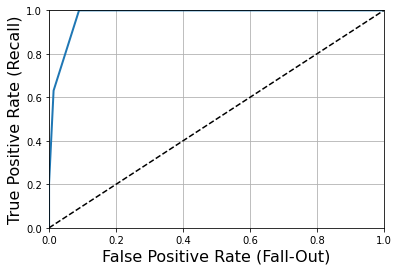

Saving figure ROC for KNN Full Model


<Figure size 432x288 with 0 Axes>

In [143]:
y_probas_knn = neigh_clf.predict_proba( X_train_all)
y_scores_knn = y_probas_knn [:,-1]

plot_roc_curve(y_train_all ,y_scores_knn)
save_fig("ROC for KNN Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [144]:
y_valid_pred = neigh_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[643  25]
 [ 48  24]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.4898
Recall =  0.3333
F1 Value =  0.3967


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [145]:
neigh_clf.fit(X_train_selected, y_train_selected)
neigh_scores = cross_val_score(neigh_clf, X_train_selected, y_train_selected, cv=6)
print(neigh_scores.mean())

0.9238546698872785


**Confusion Matrix**

In [146]:
y_train_pred = neigh_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3088   30]
 [ 121  215]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8776
Recall =  0.6399
F1 Value =  0.7401


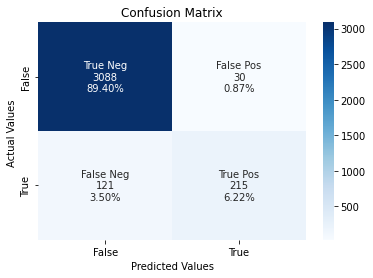

In [147]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9867


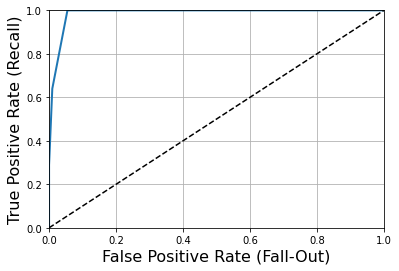

Saving figure ROC for KNN Partial Model


<Figure size 432x288 with 0 Axes>

In [148]:
y_probas_knn = neigh_clf.predict_proba( X_train_selected)
y_scores_knn = y_probas_knn [:,-1]

plot_roc_curve(y_train_selected ,y_scores_knn)
save_fig("ROC for KNN Partial Model")


## <span style='color:Orange'>Performance on Validation Set

In [149]:
y_valid_pred = neigh_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[654  14]
 [ 50  22]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.6111
Recall =  0.3056
F1 Value =  0.4074


## <span style='color:Red'> Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

logit_clf = LogisticRegression(random_state=42,max_iter=10000,penalty="l2",
                              solver="liblinear")

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [151]:
logit_clf.fit(X_train_all, y_train_all)

LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

**Confusion Matrix**

In [152]:
y_train_pred = logit_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3085   33]
 [ 103  233]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8759
Recall =  0.6935
F1 Value =  0.7741


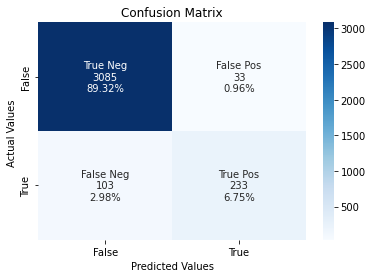

In [153]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9636


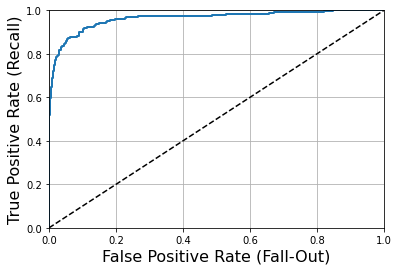

Saving figure ROC for Logistic Full Model


<Figure size 432x288 with 0 Axes>

In [154]:
y_probas_logit = logit_clf.predict_proba( X_train_all)
y_scores_logit = y_probas_logit [:,-1]

plot_roc_curve(y_train_all ,y_scores_logit)
save_fig("ROC for Logistic Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [155]:
y_valid_pred = logit_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[659   9]
 [ 23  49]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8448
Recall =  0.6806
F1 Value =  0.7538


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [156]:
logit_clf.fit(X_train_selected, y_train_selected)
logit_scores = cross_val_score(logit_clf, X_train_selected, y_train_selected, cv=6)
print(logit_scores.mean())

0.9583137077294687


**Confusion Matrix**

In [157]:
y_train_pred = logit_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3091   27]
 [ 115  221]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.8911
Recall =  0.6577
F1 Value =  0.7568


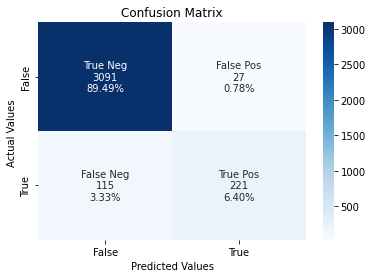

In [158]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9611


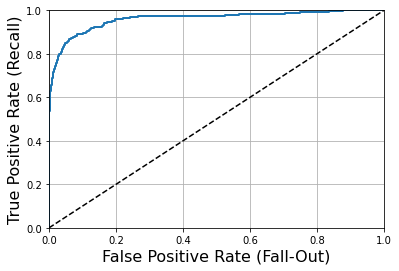

Saving figure ROC for Logistic Partial Model


<Figure size 432x288 with 0 Axes>

In [159]:
y_probas_logit = logit_clf.predict_proba( X_train_selected)
y_scores_logit = y_probas_logit [:,-1]

plot_roc_curve(y_train_selected ,y_scores_logit)
save_fig("ROC for Logistic Partial Model")


## <span style='color:Orange'>Performance on Validation Set

In [160]:
y_valid_pred = logit_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[659   9]
 [ 29  43]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8269
Recall =  0.5972
F1 Value =  0.6935


## <span style='color:Red'> CART

In [161]:
from sklearn.tree import DecisionTreeClassifier

cart_clf = DecisionTreeClassifier(random_state=42,min_samples_split=6,
                                  min_samples_leaf = 3,max_features="sqrt",class_weight={0:2,1:3})

## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [162]:
cart_clf.fit(X_train_all, y_train_all)
cart_scores = cross_val_score(cart_clf, X_train_all, y_train_all, cv=6)
print(cart_scores.mean())

0.958311191626409


**Confusion Matrix**

In [163]:
y_train_pred = cart_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[3087   31]
 [  52  284]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.9016
Recall =  0.8452
F1 Value =  0.8725


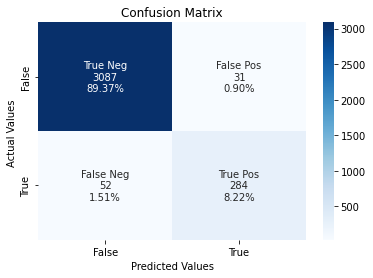

In [164]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9951


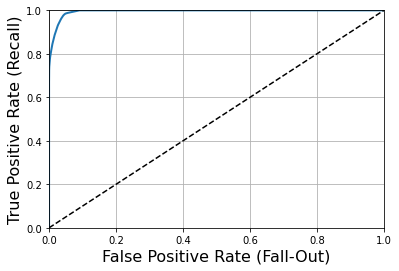

Saving figure ROC for CART Full Model


<Figure size 432x288 with 0 Axes>

In [165]:
y_probas_cart = cart_clf.predict_proba( X_train_all)
y_scores_cart = y_probas_cart [:,-1]

plot_roc_curve(y_train_all ,y_scores_cart)
save_fig("ROC for CART Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [166]:
y_valid_pred = cart_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[655  13]
 [ 14  58]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8169
Recall =  0.8056
F1 Value =  0.8112


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [167]:
cart_clf.fit(X_train_selected, y_train_selected)
cart_scores = cross_val_score(cart_clf, X_train_selected, y_train_selected, cv=6)
print(cart_scores.mean())

0.9649677938808373


**Confusion Matrix**

In [168]:
y_train_pred = cart_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[3098   20]
 [  29  307]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.9388
Recall =  0.9137
F1 Value =  0.9261


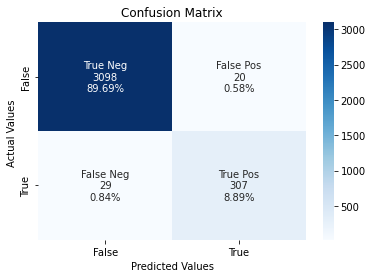

In [169]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9983


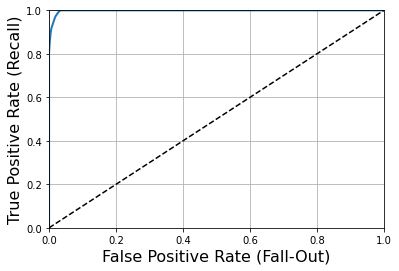

Saving figure ROC for CART Partial Model


<Figure size 432x288 with 0 Axes>

In [170]:
y_probas_cart = cart_clf.predict_proba( X_train_selected)
y_scores_cart = y_probas_cart [:,-1]

plot_roc_curve(y_train_selected ,y_scores_cart)
save_fig("ROC for CART Partial Model")

## <span style='color:Orange'>Performance on Validation Set

In [171]:
y_valid_pred = cart_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[665   3]
 [ 12  60]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9524
Recall =  0.8333
F1 Value =  0.8889


## <span style='color:Red'> Bayesian Learning

## <span style='color:Red'> Naïve Bayes (Gaussian)

In [172]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()


## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [173]:
gnb_clf.fit(X_train_all, y_train_all)
gnb_scores = cross_val_score(gnb_clf, X_train_all, y_train_all, cv=6)
print(gnb_scores.mean())

0.8992567431561995


**Confusion Matrix**

In [174]:
y_train_pred = gnb_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[2934  184]
 [ 153  183]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.4986
Recall =  0.5446
F1 Value =  0.5206


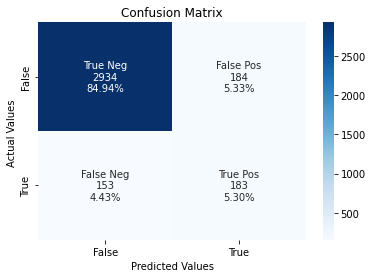

In [175]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9306


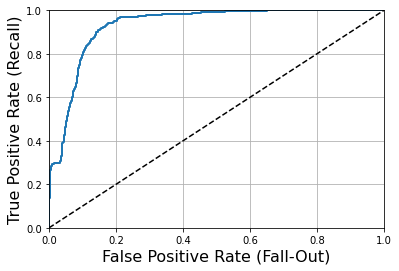

Saving figure ROC for Gaussian Naive Bayes Full Model


<Figure size 432x288 with 0 Axes>

In [176]:
y_probas_gnb = gnb_clf.predict_proba( X_train_all)
y_scores_gnb = y_probas_gnb [:,-1]

plot_roc_curve(y_train_all ,y_scores_gnb)
save_fig("ROC for Gaussian Naive Bayes Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [177]:
y_valid_pred = gnb_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[624  44]
 [ 37  35]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.443
Recall =  0.4861
F1 Value =  0.4636


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [178]:
gnb_clf.fit(X_train_selected, y_train_selected)
gnb_scores = cross_val_score(gnb_clf, X_train_selected, y_train_selected, cv=6)
print(gnb_scores.mean())

0.9009938607085345


**Confusion Matrix**

In [179]:
y_train_pred = gnb_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[2929  189]
 [ 150  186]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.496
Recall =  0.5536
F1 Value =  0.5232


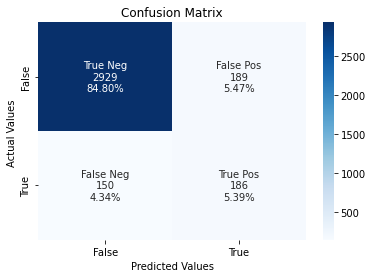

In [180]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.9326


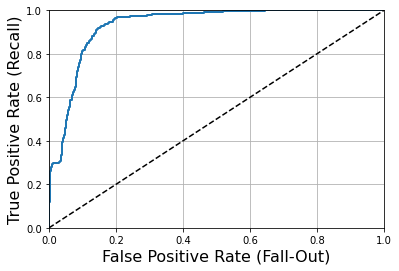

Saving figure ROC for Gaussian Naive Bayse Partial Model


<Figure size 432x288 with 0 Axes>

In [181]:
y_probas_gnb = gnb_clf.predict_proba( X_train_selected)
y_scores_gnb = y_probas_gnb [:,-1]

plot_roc_curve(y_train_selected ,y_scores_gnb)
save_fig("ROC for Gaussian Naive Bayse Partial Model")

## <span style='color:Orange'>Performance on Validation Set

In [182]:
y_valid_pred = gnb_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[624  44]
 [ 36  36]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.45
Recall =  0.5
F1 Value =  0.4737


## <span style='color:Red'> Naïve Bayes (Multinomial )


In [183]:
from sklearn.naive_bayes import MultinomialNB

gnb_multi_clf = MultinomialNB()


## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [184]:
gnb_multi_clf.fit(X_train_all, y_train_all)
gnb_multi_scores = cross_val_score(gnb_multi_clf, X_train_all, y_train_all, cv=6)
print(gnb_multi_scores.mean())

0.7678170289855073


**Confusion Matrix**

In [185]:
y_train_pred = gnb_multi_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[2437  681]
 [ 112  224]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.2475
Recall =  0.6667
F1 Value =  0.361


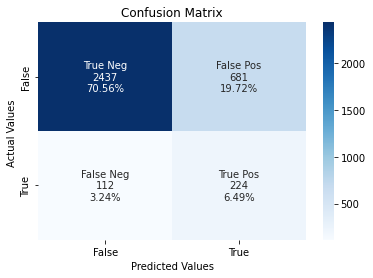

In [186]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.807


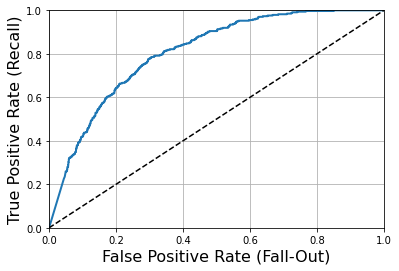

Saving figure ROC for Multinomial Naive Bayes Full Model


<Figure size 432x288 with 0 Axes>

In [187]:
y_probas_gnb_multi = gnb_multi_clf.predict_proba( X_train_all)
y_scores_gnb_multi = y_probas_gnb_multi [:,-1]

plot_roc_curve(y_train_all ,y_scores_gnb_multi)
save_fig("ROC for Multinomial Naive Bayes Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [188]:
y_valid_pred = gnb_multi_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[528 140]
 [ 19  53]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.2746
Recall =  0.7361
F1 Value =  0.4


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [189]:
gnb_multi_clf.fit(X_train_selected, y_train_selected)
gnb_multi_scores = cross_val_score(gnb_multi_clf, X_train_selected, y_train_selected, cv=6)
print(gnb_multi_scores.mean())

0.773257347020934


**Confusion Matrix**

In [190]:
y_train_pred = gnb_multi_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[2397  721]
 [ 114  222]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.2354
Recall =  0.6607
F1 Value =  0.3471


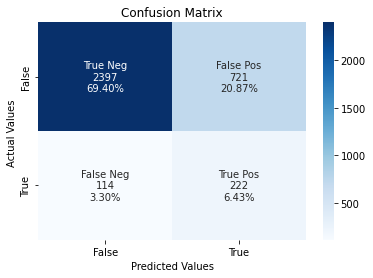

In [191]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.7067


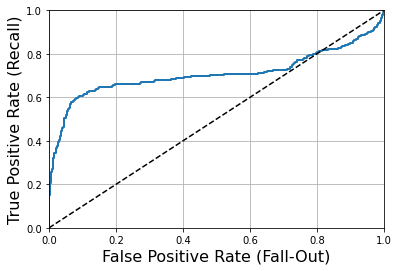

Saving figure ROC for Multinomial Naive Bayse Partial Model


<Figure size 432x288 with 0 Axes>

In [192]:
y_probas_gnb_multi = gnb_multi_clf.predict_proba( X_train_selected)
y_scores_gnb_multi = y_probas_gnb_multi [:,-1]

plot_roc_curve(y_train_selected ,y_scores_gnb_multi)
save_fig("ROC for Multinomial Naive Bayse Partial Model")

## <span style='color:Orange'>Performance on Validation Set

In [193]:
y_valid_pred = gnb_multi_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[526 142]
 [ 28  44]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.2366
Recall =  0.6111
F1 Value =  0.3411


## <span style='color:Red'> Naïve Bayes (Complement)


In [194]:
from sklearn.naive_bayes import ComplementNB

gnb_comple_clf = ComplementNB()


## <span style='color:Blue'>Full Model

## <span style='color:Orange'> Training

In [195]:
gnb_comple_clf.fit(X_train_all, y_train_all)
gnb_comple_scores = cross_val_score(gnb_comple_clf, X_train_all, y_train_all, cv=6)
print(gnb_comple_scores.mean())

0.7504463566827697


**Confusion Matrix**

In [196]:
y_train_pred = gnb_comple_clf.predict(X_train_all)

print_classification_report(y_train_all,y_train_pred)


=============Confusion Matrix =============
[[2355  763]
 [ 101  235]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.2355
Recall =  0.6994
F1 Value =  0.3523


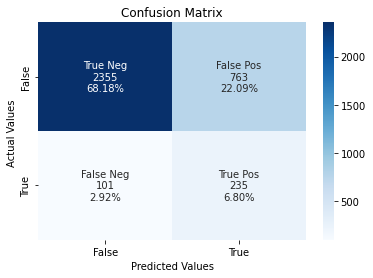

In [197]:
cf_matrix=confusion_matrix(y_train_all, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.807


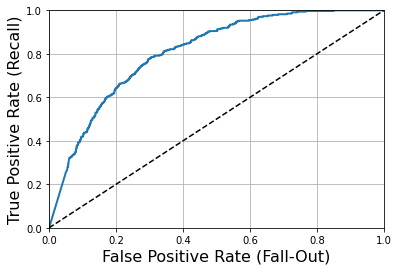

Saving figure ROC for Complement Naive Bayes Full Model


<Figure size 432x288 with 0 Axes>

In [198]:
y_probas_gnb_comple = gnb_comple_clf.predict_proba( X_train_all)
y_scores_gnb_comple = y_probas_gnb_comple [:,-1]

plot_roc_curve(y_train_all ,y_scores_gnb_comple)
save_fig("ROC for Complement Naive Bayes Full Model")


## <span style='color:Orange'>Performance on Validation Set

In [199]:
y_valid_pred = gnb_comple_clf.predict(X_valid_all)

print_classification_report(y_valid_all,y_valid_pred)


=============Confusion Matrix =============
[[505 163]
 [ 16  56]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.2557
Recall =  0.7778
F1 Value =  0.3849


## <span style='color:Blue'>Model with Selected Attributes

## <span style='color:Orange'> Training

In [200]:
gnb_comple_clf.fit(X_train_selected, y_train_selected)
gnb_comple_scores = cross_val_score(gnb_comple_clf, X_train_selected, y_train_selected, cv=6)
print(gnb_comple_scores.mean())

0.546285728663446


**Confusion Matrix**

In [201]:
y_train_pred = gnb_comple_clf.predict(X_train_selected)

print_classification_report(y_train_selected,y_train_pred)


=============Confusion Matrix =============
[[1533 1585]
 [ 100  236]]

Perfect Prediction If Done
[[3118    0]
 [   0  336]]

=============Sumarry Measures==============
Precision Score =  0.1296
Recall =  0.7024
F1 Value =  0.2188


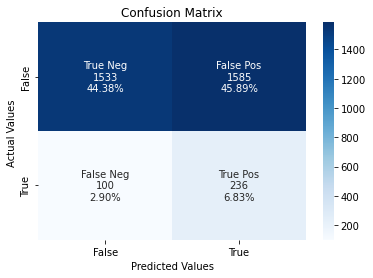

In [202]:
cf_matrix=confusion_matrix(y_train_selected, y_train_pred)

plot_cf_matrix(cf_matrix)

**ROC Curve**

0.7067


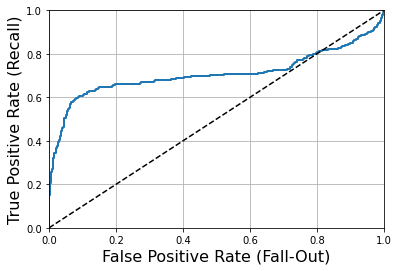

Saving figure ROC for Complement Naive Bayse Partial Model


<Figure size 432x288 with 0 Axes>

In [203]:
y_probas_gnb_comple = gnb_comple_clf.predict_proba( X_train_selected)
y_scores_gnb_comple = y_probas_gnb_comple [:,-1]

plot_roc_curve(y_train_selected ,y_scores_gnb_comple)
save_fig("ROC for Complement Naive Bayse Partial Model")

## <span style='color:Orange'>Performance on Validation Set

In [204]:
y_valid_pred = gnb_comple_clf.predict(X_valid_selected)

print_classification_report(y_valid_selected,y_valid_pred)


=============Confusion Matrix =============
[[352 316]
 [ 26  46]]

Perfect Prediction If Done
[[668   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.1271
Recall =  0.6389
F1 Value =  0.212


# <span style='color:Green'>  Performance of different classifiers on Test Data

## <span style='color:Red'>List of Classifiers :

**Clasification Algorithm**------------------**Alias** 
* SVM (Polynomial Kernel)---------------------svm_clf_poly
* SVM (Linear Kernel)------------------------svm_clf_lin
* SVM (RBF Kernel)---------------------------svm_clf_rbf
* SVM (Sigmoid Kernel)-----------------------svm_clf_sig
* Ensemble (Random Forest)-------------------forest_clf 
* Ensemble (Bagging)-------------------------bagging_clf 
* Gradient Boosting--------------------------gradient_boosting_clf
* Ada Boost----------------------------------ada_boosting_clf
* Stacking-----------------------------------Stacking_clf
* KNN----------------------------------------neigh_clf
* Logistic Regression------------------------logit_clf
* CART---------------------------------------cart_clf 
* Naïve Bayes (Gaussian)---------------------gnb_clf
* Naïve Bayes (Multinomial)------------------gnb_multi_clf
* Naïve Bayes (Complement)-------------------gnb_comple_clf 
    

## <span style='color:Orange'>Test Data : Performance

## <span style='color:Red'>SVM (Polynomial Kernel)

## <span style='color:Blue'> Full Model

In [205]:
svm_clf_poly.fit(X_train_all, y_train_all)

y_test_pred = svm_clf_poly.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[648  21]
 [ 11  61]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.7439
Recall =  0.8472
F1 Value =  0.7922


## <span style='color:Blue'>Model with Selected Attributes

In [206]:
svm_clf_poly.fit(X_train_selected, y_train_selected)

y_test_pred = svm_clf_poly.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[641  28]
 [  7  65]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.6989
Recall =  0.9028
F1 Value =  0.7879


## <span style='color:Red'>SVM (Linear Kernel)

## <span style='color:Blue'> Full Model

In [207]:
svm_clf_lin.fit(X_train_all, y_train_all)

y_test_pred = svm_clf_lin.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[653  16]
 [ 16  56]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.7778
Recall =  0.7778
F1 Value =  0.7778


## <span style='color:Blue'>Model with Selected Attributes

In [208]:
svm_clf_lin.fit(X_train_selected, y_train_selected)

y_test_pred = svm_clf_lin.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[654  15]
 [ 19  53]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.7794
Recall =  0.7361
F1 Value =  0.7571


## <span style='color:Red'>SVM (RBF Kernel)

## <span style='color:Blue'> Full Model

In [209]:
svm_clf_rbf.fit(X_train_all, y_train_all)

y_test_pred = svm_clf_rbf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[644  25]
 [  6  66]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.7253
Recall =  0.9167
F1 Value =  0.8098


## <span style='color:Blue'>Model with Selected Attributes

In [210]:
svm_clf_rbf.fit(X_train_selected, y_train_selected)

y_test_pred = svm_clf_rbf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[639  30]
 [  4  68]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.6939
Recall =  0.9444
F1 Value =  0.8


## <span style='color:Red'>SVM (Sigmoid Kernel)

## <span style='color:Blue'> Full Model

In [211]:
svm_clf_sig.fit(X_train_all, y_train_all)

y_test_pred = svm_clf_sig.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[555 114]
 [ 14  58]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.3372
Recall =  0.8056
F1 Value =  0.4754


## <span style='color:Blue'>Model with Selected Attributes

In [212]:
svm_clf_sig.fit(X_train_selected, y_train_selected)

y_test_pred = svm_clf_sig.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[550 119]
 [ 12  60]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.3352
Recall =  0.8333
F1 Value =  0.4781


## <span style='color:Red'>Ensemble (Random Forest)

## <span style='color:Blue'> Full Model

In [213]:
forest_clf.fit(X_train_all, y_train_all)

y_test_pred = forest_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[657  12]
 [  3  69]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8519
Recall =  0.9583
F1 Value =  0.902


## <span style='color:Blue'>Model with Selected Attributes

In [214]:
forest_clf.fit(X_train_selected, y_train_selected)

y_test_pred = forest_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[652  17]
 [  3  69]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8023
Recall =  0.9583
F1 Value =  0.8734


## <span style='color:Red'>Ensemble (Bagging)

## <span style='color:Blue'> Full Model

In [215]:
bagging_clf.fit(X_train_all, y_train_all)

y_test_pred = bagging_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[666   3]
 [  9  63]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9545
Recall =  0.875
F1 Value =  0.913


## <span style='color:Blue'>Model with Selected Attributes

In [216]:
bagging_clf.fit(X_train_selected, y_train_selected)

y_test_pred = bagging_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[666   3]
 [  8  64]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9552
Recall =  0.8889
F1 Value =  0.9209


## <span style='color:Red'>Gradient Boosting 

## <span style='color:Blue'> Full Model

In [217]:
gradient_boosting_clf.fit(X_train_all, y_train_all)

y_test_pred = gradient_boosting_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[658  11]
 [  8  64]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8533
Recall =  0.8889
F1 Value =  0.8707


## <span style='color:Blue'>Model with Selected Attributes

In [218]:
gradient_boosting_clf.fit(X_train_selected, y_train_selected)

y_test_pred = gradient_boosting_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[664   5]
 [  8  64]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9275
Recall =  0.8889
F1 Value =  0.9078


## <span style='color:Red'> Ada Boost 

## <span style='color:Blue'> Full Model

In [219]:
ada_boosting_clf.fit(X_train_all, y_train_all)

y_test_pred = ada_boosting_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[657  12]
 [ 20  52]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8125
Recall =  0.7222
F1 Value =  0.7647


## <span style='color:Blue'>Model with Selected Attributes

In [220]:
ada_boosting_clf.fit(X_train_selected, y_train_selected)

y_test_pred = ada_boosting_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[659  10]
 [ 15  57]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8507
Recall =  0.7917
F1 Value =  0.8201


## <span style='color:Red'> Stacking

## <span style='color:Blue'> Full Model

In [221]:
Stacking_clf.fit(X_train_all, y_train_all)

y_test_pred = Stacking_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[666   3]
 [ 10  62]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9538
Recall =  0.8611
F1 Value =  0.9051


## <span style='color:Blue'>Model with Selected Attributes

In [222]:
Stacking_clf.fit(X_train_selected, y_train_selected)

y_test_pred = Stacking_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[666   3]
 [ 10  62]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.9538
Recall =  0.8611
F1 Value =  0.9051


## <span style='color:Red'> KNN  

## <span style='color:Blue'> Full Model

In [223]:
neigh_clf.fit(X_train_all, y_train_all)

y_test_pred = neigh_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[651  18]
 [ 45  27]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.6
Recall =  0.375
F1 Value =  0.4615


## <span style='color:Blue'>Model with Selected Attributes

In [224]:
neigh_clf.fit(X_train_selected, y_train_selected)

y_test_pred = neigh_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[647  22]
 [ 41  31]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.5849
Recall =  0.4306
F1 Value =  0.496


## <span style='color:Red'>  Logistic Regression 

## <span style='color:Blue'> Full Model

In [225]:
logit_clf.fit(X_train_all, y_train_all)

y_test_pred = logit_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[660   9]
 [ 22  50]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8475
Recall =  0.6944
F1 Value =  0.7634


## <span style='color:Blue'>Model with Selected Attributes

In [226]:
logit_clf.fit(X_train_selected, y_train_selected)

y_test_pred = logit_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[659  10]
 [ 27  45]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8182
Recall =  0.625
F1 Value =  0.7087


## <span style='color:Red'>CART     

## <span style='color:Blue'> Full Model

In [227]:
cart_clf.fit(X_train_all, y_train_all)

y_test_pred = cart_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[658  11]
 [ 19  53]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.8281
Recall =  0.7361
F1 Value =  0.7794


## <span style='color:Blue'>Model with Selected Attributes

In [228]:
cart_clf.fit(X_train_selected, y_train_selected)

y_test_pred = cart_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[654  15]
 [ 14  58]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.7945
Recall =  0.8056
F1 Value =  0.8


## <span style='color:Red'> Naïve Bayes (Gaussian)

## <span style='color:Blue'> Full Model

In [229]:
gnb_clf.fit(X_train_all, y_train_all)

y_test_pred = gnb_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[630  39]
 [ 41  31]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.4429
Recall =  0.4306
F1 Value =  0.4366


## <span style='color:Blue'>Model with Selected Attributes

In [230]:
gnb_clf.fit(X_train_selected, y_train_selected)

y_test_pred = gnb_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[630  39]
 [ 41  31]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.4429
Recall =  0.4306
F1 Value =  0.4366


## <span style='color:Red'> Naïve Bayes (Multinomial)

## <span style='color:Blue'> Full Model

In [231]:
gnb_multi_clf.fit(X_train_all, y_train_all)

y_test_pred = gnb_multi_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[529 140]
 [ 29  43]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.235
Recall =  0.5972
F1 Value =  0.3373


## <span style='color:Blue'>Model with Selected Attributes

In [232]:
gnb_multi_clf.fit(X_train_selected, y_train_selected)

y_test_pred = gnb_multi_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[518 151]
 [ 20  52]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.2562
Recall =  0.7222
F1 Value =  0.3782


## <span style='color:Red'> Naïve Bayes (Complement)

## <span style='color:Blue'> Full Model

In [233]:
gnb_comple_clf.fit(X_train_all, y_train_all)

y_test_pred = gnb_comple_clf.predict(X_test_all)

print_classification_report(y_test_all,y_test_pred)


=============Confusion Matrix =============
[[502 167]
 [ 27  45]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.2123
Recall =  0.625
F1 Value =  0.3169


## <span style='color:Blue'>Model with Selected Attributes

In [234]:
gnb_comple_clf.fit(X_train_selected, y_train_selected)

y_test_pred = gnb_comple_clf.predict(X_test_selected)

print_classification_report(y_test_selected,y_test_pred)


=============Confusion Matrix =============
[[344 325]
 [ 13  59]]

Perfect Prediction If Done
[[669   0]
 [  0  72]]

=============Sumarry Measures==============
Precision Score =  0.1536
Recall =  0.8194
F1 Value =  0.2588


# <span style='color:Green'>  Prediction of new data

In [235]:
def print_class(y_predict):
    y_predict=np.ndarray.flatten(y_predict)
    for i in range(len(y_predict)):
        if y_predict[i]==1:
            print (f"Prediction Against {i}th row is = Loan Given")
        else:
            print (f"Prediction Against {i}th row is = Loan Not Given")

## Input data for prediction Here

**Please enter the file name for prediction data set here**

In [236]:
prediction_data = pd.read_csv('prediction.csv')
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10 non-null     int64  
 1   Experience          10 non-null     int64  
 2   Income              10 non-null     int64  
 3   Family              10 non-null     int64  
 4   CCAvg               10 non-null     float64
 5   Education           10 non-null     int64  
 6   Mortgage            10 non-null     int64  
 7   Securities Account  10 non-null     int64  
 8   CD Account          10 non-null     int64  
 9   Online              10 non-null     int64  
 10  CreditCard          10 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 1008.0 bytes


##  <span style='color:blue'>PreProcess Prediction data

<span style='color:Red'> **We have seen full model performs very well. Hence Here prediction will assume only the full models** </span>

In [237]:
X_predict_all = preprocess_pipeline_all.transform(prediction_data)

In [238]:
X_predict_all.shape

(10, 20)

In [239]:
X_predict_selected = preprocess_pipeline_selected.transform(prediction_data)

In [240]:
X_predict_selected.shape

(10, 12)

## <span style='color:Red'> Full Model

In [241]:
svm_clf_poly.fit(X_train_all, y_train_all)
svm_clf_lin.fit(X_train_all, y_train_all)
svm_clf_rbf.fit(X_train_all, y_train_all)
svm_clf_sig.fit(X_train_all, y_train_all)

forest_clf.fit(X_train_all, y_train_all)
bagging_clf.fit(X_train_all, y_train_all)
gradient_boosting_clf.fit(X_train_all, y_train_all)
ada_boosting_clf.fit(X_train_all, y_train_all)

Stacking_clf.fit(X_train_all, y_train_all)
neigh_clf.fit(X_train_all, y_train_all)
logit_clf.fit(X_train_all, y_train_all)
cart_clf.fit(X_train_all, y_train_all)

gnb_clf.fit(X_train_all, y_train_all)
gnb_multi_clf.fit(X_train_all, y_train_all)
gnb_comple_clf.fit(X_train_all, y_train_all)


ComplementNB()

## <span style='color:Blue'> SVM (Polynomial)

In [242]:
y_predict = svm_clf_poly.predict(X_predict_all)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


In [243]:
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

## <span style='color:Blue'> SVM (Linear)

In [244]:
y_predict = svm_clf_lin.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> SVM (RBF)

In [245]:
y_predict = svm_clf_rbf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> SVM (Sigmoid)

In [246]:
y_predict = svm_clf_sig.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Random Forest

In [247]:
y_predict = forest_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Bagging

In [248]:
y_predict = bagging_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'>Gradient Boosting

In [249]:
y_predict=gradient_boosting_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Ada Boost

In [250]:
y_predict=ada_boosting_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Stacking

In [251]:
y_predict=Stacking_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> KNN

In [252]:
y_predict=neigh_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Logistic

In [253]:
y_predict=logit_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> CART

In [254]:
y_predict=cart_clf.predict(X_predict_all)


print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'>Naive Bayes Gaussian

In [255]:
y_predict=gnb_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Not Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Naive Bayes Multinomial

In [256]:
y_predict=gnb_multi_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Not Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Naive Bayes Complement

In [257]:
y_predict=gnb_comple_clf.predict(X_predict_all)

print_class(y_predict)


Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Not Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Red'>Model with Selected Attributes

In [258]:
svm_clf_poly.fit(X_train_selected, y_train_selected)
svm_clf_lin.fit(X_train_selected, y_train_selected)
svm_clf_rbf.fit(X_train_selected, y_train_selected)
svm_clf_sig.fit(X_train_selected, y_train_selected)

forest_clf.fit(X_train_selected, y_train_selected)
bagging_clf.fit(X_train_selected, y_train_selected)
gradient_boosting_clf.fit(X_train_selected, y_train_selected)
ada_boosting_clf.fit(X_train_selected, y_train_selected)

Stacking_clf.fit(X_train_selected, y_train_selected)
neigh_clf.fit(X_train_selected, y_train_selected)
logit_clf.fit(X_train_selected, y_train_selected)
cart_clf.fit(X_train_selected, y_train_selected)

gnb_clf.fit(X_train_selected, y_train_selected)
gnb_multi_clf.fit(X_train_selected, y_train_selected)
gnb_comple_clf.fit(X_train_selected, y_train_selected)


ComplementNB()

## <span style='color:Blue'> SVM (Polynomial)

In [259]:
y_predict = svm_clf_poly.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> SVM (Linear)

In [260]:
y_predict = svm_clf_lin.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> SVM (RBF)

In [261]:
y_predict = svm_clf_rbf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> SVM (Sigmoid)

In [262]:
y_predict = svm_clf_sig.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Random Forest

In [263]:
y_predict = forest_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Bagging

In [264]:
y_predict = bagging_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'>Gradient Boosting

In [265]:
y_predict = gradient_boosting_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Ada Boost

In [266]:
y_predict = ada_boosting_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Stacking

In [267]:
y_predict = Stacking_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> KNN

In [268]:
y_predict = neigh_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Not Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Logistic

In [269]:
y_predict = logit_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> CART

In [270]:
y_predict = cart_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'>Naive Bayes Gaussian

In [271]:
y_predict = gnb_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Not Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Not Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Not Given
Prediction Against 9th row is = Loan Not Given


## <span style='color:Blue'> Naive Bayes Multinomial

In [272]:
y_predict = gnb_multi_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Not Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Given


## <span style='color:Blue'> Naive Bayes Complement

In [273]:
y_predict = gnb_comple_clf.predict(X_predict_selected)

print_class(y_predict)

Prediction Against 0th row is = Loan Given
Prediction Against 1th row is = Loan Not Given
Prediction Against 2th row is = Loan Not Given
Prediction Against 3th row is = Loan Not Given
Prediction Against 4th row is = Loan Given
Prediction Against 5th row is = Loan Not Given
Prediction Against 6th row is = Loan Not Given
Prediction Against 7th row is = Loan Given
Prediction Against 8th row is = Loan Given
Prediction Against 9th row is = Loan Given


# Conclusion

**<span style='color:Green'> The Full model works well. If data collection is not expensive, Full model should be preferred**

## <span style='color:Red'>Thank you